In [30]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime,timedelta

In [2]:
import dotenv
import os

# Load secret file
dotenv.load_dotenv('.env')

headers = {
  "Authorization":f"apikey {os.environ.get('apikey')}"
}
url_carparks = 'https://api.transport.nsw.gov.au/v1/carpark'
# url_carpark_history = 'https://api.transport.nsw.gov.au/v1/carpark/history'

list_of_carparks = requests.get(url_carparks, headers=headers).json()

# Create a json file and write the data if it doesn't exist
if not os.path.exists('./data/carparks.json'):
  with open('./data/carparks.json', 'w') as f:
    json.dumps(list_of_carparks, f)

# The format of the file itself is a dictionary, thus requiring some creativity to read
with open('./data/carparks.json') as f:
  data = json.load(f)

# Convert the dictionary to a dataframe
df_carparks = pd.DataFrame.from_dict(data, orient='index')
# Resetting the index to label the columns afterwards
df_carparks = df_carparks.reset_index()
df_carparks.columns = ['facility_id', 'CarParkName']

df_carparks

carpark_details_array=[]
for index, row in df_carparks.iterrows():
  facility = row['facility_id']
  url = f'https://api.transport.nsw.gov.au/v1/carpark?facility={facility}'


  # Make request
  response = requests.get(url, headers=headers).json()

  # Add to array
  carpark_details_array.append(response)

carpark_details_array

[{'tsn': '2155384',
  'time': '742877319',
  'spots': '1004',
  'zones': [{'spots': '152',
    'zone_id': 'CPS-CUD1',
    'occupancy': {'loop': None,
     'total': '150',
     'monthlies': None,
     'open_gate': None,
     'transients': None},
    'zone_name': 'Tallawong Station At-Grade A Car Park',
    'parent_zone_id': '0'},
   {'spots': '455',
    'zone_id': 'CPS-CUD2',
    'occupancy': {'loop': None,
     'total': '455',
     'monthlies': None,
     'open_gate': None,
     'transients': None},
    'zone_name': 'Tallawong Station At-Grade B Car Park',
    'parent_zone_id': '0'},
   {'spots': '397',
    'zone_id': 'CPS-CUD3',
    'occupancy': {'loop': None,
     'total': '376',
     'monthlies': None,
     'open_gate': None,
     'transients': None},
    'zone_name': 'Tallawong Station At-Grade D Car Park',
    'parent_zone_id': '0'}],
  'ParkID': '1',
  'occupancy': {'loop': None,
   'total': '981',
   'monthlies': None,
   'open_gate': None,
   'transients': None},
  'MessageDate

In [3]:
# Saving carpark details to file
with open('./data/carpark_details.json', 'w') as f:
  json.dump(carpark_details_array, f)

# Reading as a dataframe
df_carpark_details = pd.read_json('./data/carpark_details.json')
df_carpark_details

,tsn,time,spots,zones,ParkID,occupancy,MessageDate,facility_id,facility_name,tfnsw_facility_id
0,2155384,742877319,1004,"[{'spots': '152', 'zone_id': 'CPS-CUD1', 'occu...",1,"{'loop': None, 'total': '981', 'monthlies': No...",2023-07-17T12:48:39,1,Tallawong Station Car Park,2155384CCP001
1,2101131,760523635,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '60', 'monthlies': Non...",2024-02-06T19:33:55,10,Warriewood Car Park,2101131TPR001
2,2101130,760523847,46,"[{'spots': '46', 'zone_id': '1', 'occupancy': ...",1,"{'loop': '63981', 'total': '6', 'monthlies': N...",2024-02-06T19:37:27,11,Narrabeen Car Park,2101130TPR001
3,2103108,760523782,68,"[{'spots': '68', 'zone_id': '1', 'occupancy': ...",1,"{'loop': None, 'total': '37', 'monthlies': Non...",2024-02-06T19:36:22,12,Mona Vale Car Park,2103108TPR001
4,2099207,760523886,117,"[{'spots': '117', 'zone_id': '1', 'occupancy':...",1,"{'loop': '53474', 'total': '37', 'monthlies': ...",2024-02-06T19:38:06,13,Dee Why Car Park,2099207TPR001
5,211420,760523565,151,"[{'spots': '151', 'zone_id': '1', 'occupancy':...",1,"{'loop': '228460', 'total': '23', 'monthlies':...",2024-02-06T19:32:45,14,West Ryde Car Park,211420TPR001
6,223210,760523415,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '35', 'monthlies': Non...",2024-02-06T19:30:15,15,Sutherland East Parade Car Park,223210TPR001
7,217933,760523838,1884,"[{'spots': '1884', 'zone_id': '1', 'occupancy'...",1,"{'loop': '811983', 'total': '312', 'monthlies'...",2024-02-06T19:37:18,16,Leppington Car Park,217933TPR001
8,217426,760523875,1429,"[{'spots': '1429', 'zone_id': '1', 'occupancy'...",1,"{'loop': '742989', 'total': '108', 'monthlies'...",2024-02-06T19:37:55,17,Edmondson Park South Car Park,217426TPR001
9,276010,760523931,682,"[{'spots': '682', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '107', 'monthlies': No...",2024-02-06T19:38:51,18,St Marys Car Park,276010TPR001


Deleting facility ids 486-490 as they will not be used. The source of the info indicates they contain inaccurate data for the columns that will be needed.

In [4]:
# Dropping rows 28,29,30,31,32
df_carpark_details.drop(index=[28,29,30,31,32],inplace=True)

# Resetting the index
df_carpark_details.reset_index(drop=True,inplace=True)

# Sorting by facility_id
df_carpark_details.sort_values(by='facility_id',inplace=True)
df_carpark_details

,tsn,time,spots,zones,ParkID,occupancy,MessageDate,facility_id,facility_name,tfnsw_facility_id
0,2155384,742877319,1004,"[{'spots': '152', 'zone_id': 'CPS-CUD1', 'occu...",1,"{'loop': None, 'total': '981', 'monthlies': No...",2023-07-17T12:48:39,1,Tallawong Station Car Park,2155384CCP001
11,2155382,742877319,1374,"[{'spots': '368', 'zone_id': 'CPS-KVE1', 'occu...",1,"{'loop': None, 'total': '1363', 'monthlies': N...",2023-07-17T12:48:39,2,Kellyville Station Car Park,2155382CCP001
22,2153478,742877319,800,"[{'spots': '800', 'zone_id': 'CPS-BLV', 'occup...",1,"{'loop': None, 'total': '314', 'monthlies': No...",2023-07-17T12:48:39,3,Bella Vista Station Car Park,2153478CCP001
27,2154392,742877319,600,"[{'spots': '600', 'zone_id': 'CPS-SHW', 'occup...",1,"{'loop': None, 'total': '532', 'monthlies': No...",2023-07-17T12:48:39,4,Hills Showground Station Car Park,2154392CCP001
28,2126158,742877319,400,"[{'spots': '400', 'zone_id': 'CPS-CHE', 'occup...",1,"{'loop': None, 'total': '400', 'monthlies': No...",2023-07-17T12:48:39,5,Cherrybrook Station Car Park,2126158CCP001
29,207210,760523866,213,"[{'spots': '213', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '25', 'monthlies': Non...",2024-02-06T19:37:46,6,Gordon Henry St North Car Park,207210TPR001
30,253330,760523985,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,"{'loop': None, 'total': '-2', 'monthlies': Non...",2024-02-06T19:39:45,7,Kiama Car Park,253330TPR001
31,225040,760523776,1057,"[{'spots': '1057', 'zone_id': '1', 'occupancy'...",1,"{'loop': None, 'total': '188', 'monthlies': No...",2024-02-06T19:36:16,8,Gosford Car Park,225040TPR001
32,221210,760523963,934,"[{'spots': '934', 'zone_id': '1', 'occupancy':...",1,"{'loop': '322681', 'total': '98', 'monthlies':...",2024-02-06T19:39:23,9,Revesby Car Park,221210TPR001
1,2101131,760523635,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '60', 'monthlies': Non...",2024-02-06T19:33:55,10,Warriewood Car Park,2101131TPR001


Attempting to create a date_time function that gives the dates of all days in an array from 31st December 2023 to a target date that is separated by a time delta

In [5]:
def date_getter(td):
  # Array that stores the dates to be searched for
  date_period_array = []
  
  # The last date to be searched for
  cutoff_date = datetime(2023,12,31)
  target_date = cutoff_date - td
  
  # Ensure that records of each day are obtained
  delta = timedelta(days=1)
  
  while target_date <= cutoff_date:
    date_period_array.append(target_date.strftime("%Y-%m-%d"))
    target_date += delta

  return date_period_array

In [6]:
import os

def carpark_history_period(facility, dates_array):
    data_array = []
    json_file_path = f"./data/carpark_history/facility_{facility}.json"
    
    # Request header
    headers = {
        "Authorization":f"apikey {os.environ.get('apikey')}"
    }
    
    # Deleting file if it exists
    if os.path.exists(json_file_path):
        os.remove(json_file_path)
    
    # Make a request for each date
    for date in dates_array:
        url = f'https://api.transport.nsw.gov.au/v1/carpark/history?facility={facility}&eventdate={date}'
    
        response = requests.get(url, headers=headers).json()
    
        if data_array == []:
            data_array = response
        else:
            data_array = data_array + response
    
    # Saving data to json file
    with open(json_file_path, 'w') as f:
        json.dump(data_array, f)

    # Reading json file
    with open(json_file_path) as f:
        data = json.load(f)
    
    # Converting read data into a pandas dataframe
    return pd.DataFrame(data)

In [7]:
# for key,row in df_carparks.iterrows():
#   # Get the facility id
#   facility = row['facility_id']
  
#   # Save file with carpark history for a month
#   carpark_history_period(facility=facility, dates_array=date_getter(td=timedelta(days=30)))
  
#   # Feedback once done
#   print(f"Created file for facility {facility}")

# # df.head()

Displaying facilities and their id's

In [8]:
df_carparks

,facility_id,CarParkName
0,1,Tallawong Station Car Park (historical only)
1,10,Warriewood Car Park
2,11,Narrabeen Car Park
3,12,Mona Vale Car Park
4,13,Dee Why Car Park
5,14,West Ryde Car Park
6,15,Sutherland East Parade Car Park
7,16,Leppington Car Park
8,17,Edmondson Park South Car Park
9,18,St Marys Car Park


Inspecting the `carpark_details.json` data

In [9]:
park_details = pd.read_json("data/carpark_details.json")
park_details.head(38)

,tsn,time,spots,zones,ParkID,occupancy,MessageDate,facility_id,facility_name,tfnsw_facility_id
0,2155384,742877319,1004,"[{'spots': '152', 'zone_id': 'CPS-CUD1', 'occu...",1,"{'loop': None, 'total': '981', 'monthlies': No...",2023-07-17T12:48:39,1,Tallawong Station Car Park,2155384CCP001
1,2101131,760523635,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '60', 'monthlies': Non...",2024-02-06T19:33:55,10,Warriewood Car Park,2101131TPR001
2,2101130,760523847,46,"[{'spots': '46', 'zone_id': '1', 'occupancy': ...",1,"{'loop': '63981', 'total': '6', 'monthlies': N...",2024-02-06T19:37:27,11,Narrabeen Car Park,2101130TPR001
3,2103108,760523782,68,"[{'spots': '68', 'zone_id': '1', 'occupancy': ...",1,"{'loop': None, 'total': '37', 'monthlies': Non...",2024-02-06T19:36:22,12,Mona Vale Car Park,2103108TPR001
4,2099207,760523886,117,"[{'spots': '117', 'zone_id': '1', 'occupancy':...",1,"{'loop': '53474', 'total': '37', 'monthlies': ...",2024-02-06T19:38:06,13,Dee Why Car Park,2099207TPR001
5,211420,760523565,151,"[{'spots': '151', 'zone_id': '1', 'occupancy':...",1,"{'loop': '228460', 'total': '23', 'monthlies':...",2024-02-06T19:32:45,14,West Ryde Car Park,211420TPR001
6,223210,760523415,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '35', 'monthlies': Non...",2024-02-06T19:30:15,15,Sutherland East Parade Car Park,223210TPR001
7,217933,760523838,1884,"[{'spots': '1884', 'zone_id': '1', 'occupancy'...",1,"{'loop': '811983', 'total': '312', 'monthlies'...",2024-02-06T19:37:18,16,Leppington Car Park,217933TPR001
8,217426,760523875,1429,"[{'spots': '1429', 'zone_id': '1', 'occupancy'...",1,"{'loop': '742989', 'total': '108', 'monthlies'...",2024-02-06T19:37:55,17,Edmondson Park South Car Park,217426TPR001
9,276010,760523931,682,"[{'spots': '682', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '107', 'monthlies': No...",2024-02-06T19:38:51,18,St Marys Car Park,276010TPR001


In [10]:
park_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tsn                38 non-null     int64 
 1   time               38 non-null     int64 
 2   spots              38 non-null     int64 
 3   zones              38 non-null     object
 4   ParkID             38 non-null     int64 
 5   occupancy          38 non-null     object
 6   MessageDate        38 non-null     object
 7   facility_id        38 non-null     int64 
 8   facility_name      38 non-null     object
 9   tfnsw_facility_id  38 non-null     object
dtypes: int64(5), object(5)
memory usage: 3.1+ KB


Inspecting the `carpark_history_facility_14.json`

In [12]:
# park_history = pd.read_json("data/carpark_history/carpark_history_facility_14.json")
# park_history.head()

In [ ]:
# park_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78080 entries, 0 to 78079
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tsn                78080 non-null  int64 
 1   time               78080 non-null  int64 
 2   spots              78080 non-null  int64 
 3   zones              78080 non-null  object
 4   ParkID             78080 non-null  int64 
 5   occupancy          78080 non-null  object
 6   MessageDate        78080 non-null  object
 7   facility_id        78080 non-null  int64 
 8   facility_name      78080 non-null  object
 9   tfnsw_facility_id  78080 non-null  object
dtypes: int64(5), object(5)
memory usage: 6.0+ MB


inspecting the `carparks.json` dataset

In [13]:
carparks = pd.read_json("data/carparks.json", orient= "index")
carparks.head()


,0
1,Tallawong Station Car Park (historical only)
10,Warriewood Car Park
11,Narrabeen Car Park
12,Mona Vale Car Park
13,Dee Why Car Park


In [14]:
carparks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       38 non-null     object
dtypes: object(1)
memory usage: 608.0+ bytes


inspecting the `NSW response.json` file

In [ ]:
nsw_response = pd.read_json("data/NSW response - 2022-03-13.json")
nsw_response.head()

,tsn,time,spots,zones,ParkID,occupancy,MessageDate,facility_id,facility_name,tfnsw_facility_id
0,211420,700405713,151,"[{'spots': '151', 'zone_id': '1', 'occupancy':...",1,"{'loop': '28302', 'total': '2', 'monthlies': N...",2022-03-13T00:08:33,14,West Ryde Car Park,211420TPR001
1,211420,700406314,151,"[{'spots': '151', 'zone_id': '1', 'occupancy':...",1,"{'loop': '28302', 'total': '2', 'monthlies': N...",2022-03-13T00:18:34,14,West Ryde Car Park,211420TPR001
2,211420,700406916,151,"[{'spots': '151', 'zone_id': '1', 'occupancy':...",1,"{'loop': '28302', 'total': '2', 'monthlies': N...",2022-03-13T00:28:36,14,West Ryde Car Park,211420TPR001
3,211420,700407517,151,"[{'spots': '151', 'zone_id': '1', 'occupancy':...",1,"{'loop': '28302', 'total': '2', 'monthlies': N...",2022-03-13T00:38:37,14,West Ryde Car Park,211420TPR001
4,211420,700408119,151,"[{'spots': '151', 'zone_id': '1', 'occupancy':...",1,"{'loop': '28302', 'total': '2', 'monthlies': N...",2022-03-13T00:48:39,14,West Ryde Car Park,211420TPR001


In [ ]:
nsw_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tsn                191 non-null    int64 
 1   time               191 non-null    int64 
 2   spots              191 non-null    int64 
 3   zones              191 non-null    object
 4   ParkID             191 non-null    int64 
 5   occupancy          191 non-null    object
 6   MessageDate        191 non-null    object
 7   facility_id        191 non-null    int64 
 8   facility_name      191 non-null    object
 9   tfnsw_facility_id  191 non-null    object
dtypes: int64(5), object(5)
memory usage: 15.1+ KB


In [ ]:
_park = pd.read_json("data/carpark_history/facility_15.json")
_park

,tsn,time,spots,zones,ParkID,occupancy,MessageDate,facility_id,facility_name,tfnsw_facility_id
0,223210,754664452,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '16', 'monthlies': Non...",2023-12-01T00:00:52,15,Sutherland East Parade Car Park,223210TPR001
1,223210,754665189,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '15', 'monthlies': Non...",2023-12-01T00:13:09,15,Sutherland East Parade Car Park,223210TPR001
2,223210,754665355,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '14', 'monthlies': Non...",2023-12-01T00:15:55,15,Sutherland East Parade Car Park,223210TPR001
3,223210,754665706,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '13', 'monthlies': Non...",2023-12-01T00:21:46,15,Sutherland East Parade Car Park,223210TPR001
4,223210,754665740,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '12', 'monthlies': Non...",2023-12-01T00:22:20,15,Sutherland East Parade Car Park,223210TPR001
...,...,...,...,...,...,...,...,...,...,...
18470,223210,757341099,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '98', 'monthlies': Non...",2023-12-31T23:31:39,15,Sutherland East Parade Car Park,223210TPR001
18471,223210,757341147,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '97', 'monthlies': Non...",2023-12-31T23:32:27,15,Sutherland East Parade Car Park,223210TPR001
18472,223210,757341211,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '96', 'monthlies': Non...",2023-12-31T23:33:31,15,Sutherland East Parade Car Park,223210TPR001
18473,223210,757341343,373,"[{'spots': '373', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '95', 'monthlies': Non...",2023-12-31T23:35:43,15,Sutherland East Parade Car Park,223210TPR001


In [ ]:
_park.describe()

,tsn,time,spots,ParkID,facility_id
count,18475.0,1.847500e+04,18475.0,18475.0,18475.0
mean,223210.0,7.558284e+08,373.0,1.0,15.0
std,0.0,7.040404e+05,0.0,0.0,0.0
min,223210.0,7.546645e+08,373.0,1.0,15.0
25%,223210.0,7.552248e+08,373.0,1.0,15.0
50%,223210.0,7.557671e+08,373.0,1.0,15.0
75%,223210.0,7.563410e+08,373.0,1.0,15.0
max,223210.0,7.573426e+08,373.0,1.0,15.0


In [38]:
# import pandas as pd
# import glob

# def load_json_files(file_path):
#     """Load all json files in a directory into a list"""
#     json_files = glob.glob(file_path)
#     json_data = []
#     for file in json_files:
#         with open(file, 'r') as f:
#             data = pd.json_normalize(json.load(f))
#             json_data.append(data)
#     return json_data

# def concatenate_dataframes(json_data):
#     """Concatenate a list of dataframes into one"""
#     concatenated_data = pd.concat(json_data, ignore_index=True)
#     return concatenated_data

# # Load json files
# json_data = load_json_files('data/carpark_history/facility_7.json')

# # Concatenate dataframes
# concatenated_data = concatenate_dataframes(json_data)

# # Print the concatenated dataframe
# concatenated_data


,tsn,time,spots,zones,ParkID,MessageDate,facility_id,facility_name,tfnsw_facility_id,occupancy.loop,occupancy.total,occupancy.monthlies,occupancy.open_gate,occupancy.transients
0,253330,754680376,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,2023-12-01T04:26:16,7,Kiama Car Park,253330TPR001,None,5,None,None,None
1,253330,754683734,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,2023-12-01T05:22:14,7,Kiama Car Park,253330TPR001,None,7,None,None,None
2,253330,754687723,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,2023-12-01T06:28:43,7,Kiama Car Park,253330TPR001,None,8,None,None,None
3,253330,754688235,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,2023-12-01T06:37:15,7,Kiama Car Park,253330TPR001,None,9,None,None,None
4,253330,754693058,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,2023-12-01T07:57:38,7,Kiama Car Park,253330TPR001,None,10,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,253330,757335433,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,2023-12-31T21:57:13,7,Kiama Car Park,253330TPR001,None,17,None,None,None
702,253330,757335453,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,2023-12-31T21:57:33,7,Kiama Car Park,253330TPR001,None,16,None,None,None
703,253330,757336142,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,2023-12-31T22:09:02,7,Kiama Car Park,253330TPR001,None,14,None,None,None
704,253330,757336173,42,"[{'spots': '42', 'zone_id': '1', 'occupancy': ...",1,2023-12-31T22:09:33,7,Kiama Car Park,253330TPR001,None,13,None,None,None


In [15]:

def read_json_files_into_dataframe(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The specified folder '{folder_path}' does not exist.")
        return None

    # Initialize an empty DataFrame
    combined_df = pd.DataFrame()

    # Loop through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)

            # Read the JSON file into a DataFrame
            try:
                df = pd.read_json(file_path)
            except Exception as e:
                print(f"Error reading file '{filename}': {e}")
                continue

            # Concatenate the DataFrame to the combined DataFrame
            combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

carparks_df = read_json_files_into_dataframe('data/carpark_history')

In [16]:
carparks_df

,tsn,time,spots,zones,ParkID,occupancy,MessageDate,facility_id,facility_name,tfnsw_facility_id
0,2101131,754667606,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '20', 'monthlies': Non...",2023-12-01T00:53:26,10,Warriewood Car Park,2101131TPR001
1,2101131,754667759,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '19', 'monthlies': Non...",2023-12-01T00:55:59,10,Warriewood Car Park,2101131TPR001
2,2101131,754669534,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '18', 'monthlies': Non...",2023-12-01T01:25:34,10,Warriewood Car Park,2101131TPR001
3,2101131,754669597,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '17', 'monthlies': Non...",2023-12-01T01:26:37,10,Warriewood Car Park,2101131TPR001
4,2101131,754671198,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,"{'loop': None, 'total': '16', 'monthlies': Non...",2023-12-01T01:53:18,10,Warriewood Car Park,2101131TPR001
...,...,...,...,...,...,...,...,...,...,...
78492,221210,757340347,934,"[{'spots': '934', 'zone_id': '1', 'occupancy':...",1,"{'loop': '298422', 'total': '52', 'monthlies':...",2023-12-31T23:19:07,9,Revesby Car Park,221210TPR001
78493,221210,757340513,934,"[{'spots': '934', 'zone_id': '1', 'occupancy':...",1,"{'loop': '298423', 'total': '51', 'monthlies':...",2023-12-31T23:21:53,9,Revesby Car Park,221210TPR001
78494,221210,757341113,934,"[{'spots': '934', 'zone_id': '1', 'occupancy':...",1,"{'loop': '298423', 'total': '51', 'monthlies':...",2023-12-31T23:31:53,9,Revesby Car Park,221210TPR001
78495,221210,757341714,934,"[{'spots': '934', 'zone_id': '1', 'occupancy':...",1,"{'loop': '298423', 'total': '51', 'monthlies':...",2023-12-31T23:41:54,9,Revesby Car Park,221210TPR001


In [17]:
def extract_date_time(message_date):
  date = message_date.split('T')[0]
  time = message_date.split('T')[1]
  return date,time

carparks_df_copy = carparks_df.copy()

# Separate the date and time in to 2 separate columns
carparks_df_copy[['date','time']] = carparks_df['MessageDate'].apply(extract_date_time).apply(pd.Series)

# Indicate the day of the week according to the date
carparks_df_copy['day_of_week'] = pd.to_datetime(carparks_df_copy['date']).apply(lambda x: x.strftime('%A'))

# Drop unnecessary columns
carparks_df_copy.drop(['tsn', 'occupancy','tfnsw_facility_id', 'MessageDate', 'facility_id'], axis=1, inplace=True)
carparks_df_copy.head()

,time,spots,zones,ParkID,facility_name,date,day_of_week
0,00:53:26,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,Warriewood Car Park,2023-12-01,Friday
1,00:55:59,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,Warriewood Car Park,2023-12-01,Friday
2,01:25:34,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,Warriewood Car Park,2023-12-01,Friday
3,01:26:37,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,Warriewood Car Park,2023-12-01,Friday
4,01:53:18,244,"[{'spots': '244', 'zone_id': '1', 'occupancy':...",1,Warriewood Car Park,2023-12-01,Friday


In [ ]:
# Converting the zones column to its own dataframe
df_zones = pd.DataFrame(columns=['spots', 'zone_id', 'zone_name', 'parent_zone_id', 'occupancy'])
rename_format = {
    0: 'spots',
    1: 'zone_id',
    2: 'zone_name',
    3: 'parent_zone_id',
    4: 'occupancy loops',
    5: 'occupancy total',
    6: 'occupancy monthlies',
    7: 'occupancy open_gate',
    8: 'occupancy transients'
}

# Accumulate DataFrames in a list
zones_list = []

for key, value in carparks_df['zones'].items():
    # Check if the 'zones' value is a list
    if isinstance(value, list):
        # Normalize values in each record in zones column
        val = pd.json_normalize(value)
        
        # Convert it to a DataFrame
        temp_holder = pd.DataFrame.from_dict(val.values)
        
        # Rename columns
        temp_holder.rename(mapper=rename_format, axis=1, inplace=True)
        
        # Append to the list instead of concatenating in each iteration
        zones_list.append(temp_holder)

# Concatenate all DataFrames outside the loop
df_zones = pd.concat(zones_list, ignore_index=True)

df_zones.head()

In [19]:
# # Converting the zones column to its own dataframe

# df_zones = pd.DataFrame(columns=['spots','zone_id','zone_name','parent_zone_id','occupancy'])
# rename_format = {
#     0:'spots',
#     1:'zone_id',
#     2:'zone_name',
#     3:'parent_zone_id',
#     4:'occupancy loops',
#     5:'occupancy total',
#     6:'occupancy monthlies',
#     7:'occupancy open_gate',
#     8:'occupancy transients'}



# for key,value in carparks_df['zones'].items():    
#     # Normalize values in each record in zones column
#     val = pd.json_normalize(value)
    
#     # Convert it to a dataframe
#     temp_holder = pd.DataFrame.from_dict(val.values)
#     # Renaming columns
#     temp_holder.rename(mapper=rename_format, axis=1, inplace=True)
#     # merge it with main dataframe
#     df_zones = pd.concat([df_zones, temp_holder], ignore_index=True)

# df_zones.head()

,spots,zone_id,zone_name,parent_zone_id,occupancy,occupancy loops,occupancy total,occupancy monthlies,occupancy open_gate,occupancy transients
0,244,1,Warriewood Car Park,0,NaN,None,20,None,None,None
1,244,1,Warriewood Car Park,0,NaN,None,19,None,None,None
2,244,1,Warriewood Car Park,0,NaN,None,18,None,None,None
3,244,1,Warriewood Car Park,0,NaN,None,17,None,None,None
4,244,1,Warriewood Car Park,0,NaN,None,16,None,None,None


In [20]:
# Keeping the necessary columns from the zones data frame
df_zones = df_zones[['zone_id', 'occupancy total']]
# Merge the zones dataframe to the main one 
carparks_df_copy = pd.concat([carparks_df_copy,df_zones],axis=1)
carparks_df_copy.drop('zones', axis = 1, inplace=True)

# Renaming the spots column to something more intuitive
carparks_df_copy.rename(columns={'spots': 'total_parking_spots'}, inplace=True)

# Converting the columns to their respective data types
carparks_df_copy['occupancy total'] = carparks_df_copy['occupancy total'].astype(np.int64)
carparks_df_copy['total_parking_spots'] = carparks_df_copy['total_parking_spots'].astype(np.int64)

carparks_df_copy.head()

,time,total_parking_spots,ParkID,facility_name,date,day_of_week,zone_id,occupancy total
0,00:53:26,244,1,Warriewood Car Park,2023-12-01,Friday,1,20
1,00:55:59,244,1,Warriewood Car Park,2023-12-01,Friday,1,19
2,01:25:34,244,1,Warriewood Car Park,2023-12-01,Friday,1,18
3,01:26:37,244,1,Warriewood Car Park,2023-12-01,Friday,1,17
4,01:53:18,244,1,Warriewood Car Park,2023-12-01,Friday,1,16


In [21]:
# Create a new column `parking_availability` which calculates how many parking spots are available at a given time
carparks_df_copy['parking_availability'] = carparks_df_copy['total_parking_spots'] - carparks_df_copy['occupancy total']
carparks_df_copy = carparks_df_copy[['facility_name','ParkID','zone_id','total_parking_spots','occupancy total','day_of_week', 'date', 'time', 'parking_availability']]
carparks_df_copy

,facility_name,ParkID,zone_id,total_parking_spots,occupancy total,day_of_week,date,time,parking_availability
0,Warriewood Car Park,1,1,244,20,Friday,2023-12-01,00:53:26,224
1,Warriewood Car Park,1,1,244,19,Friday,2023-12-01,00:55:59,225
2,Warriewood Car Park,1,1,244,18,Friday,2023-12-01,01:25:34,226
3,Warriewood Car Park,1,1,244,17,Friday,2023-12-01,01:26:37,227
4,Warriewood Car Park,1,1,244,16,Friday,2023-12-01,01:53:18,228
...,...,...,...,...,...,...,...,...,...
78492,Revesby Car Park,1,1,934,52,Sunday,2023-12-31,23:19:07,882
78493,Revesby Car Park,1,1,934,51,Sunday,2023-12-31,23:21:53,883
78494,Revesby Car Park,1,1,934,51,Sunday,2023-12-31,23:31:53,883
78495,Revesby Car Park,1,1,934,51,Sunday,2023-12-31,23:41:54,883


## DATA UNDERSTANDING

In [22]:
class DataUnderstanding:
    def __init__(self, df):
        self.df = df

    def examine_data(self):
        print(" ################### Details about the data ################### \n ")
        print(f"The dataset is a DataFrame with {self.df.shape[0]} rows and {self.df.shape[1]} columns\n")
        print("Columns of the dataset:", self.df.columns.to_list())
        print("\nFirst 5 records of the dataset ")
        display(self.df.head())
        # Display information about the dataset
        print("\nData information")
        display(self.df.info())
        print("\nNull Values ")
        display(self.df.isnull().sum())
        print("\nDuplicate Values ")
        print(self.df.duplicated().sum(), 'duplicate values')
        display(self.df.describe())
        print('\nData Details')
        print(f'Number of unique Parking Facilities:', carparks_df_copy.facility_name.nunique())
        print(f'Number of unique days:', carparks_df_copy.date.nunique())

# Instantiate the DataUnderstanding class
data_understanding = DataUnderstanding(carparks_df_copy)

# Replace "movie_rating_df" with your actual dataframe
data_understanding.examine_data()

 ################### Details about the data ################### 
 
The dataset is a DataFrame with 78497 rows and 9 columns

Columns of the dataset: ['facility_name', 'ParkID', 'zone_id', 'total_parking_spots', 'occupancy total', 'day_of_week', 'date', 'time', 'parking_availability']

First 5 records of the dataset 


,facility_name,ParkID,zone_id,total_parking_spots,occupancy total,day_of_week,date,time,parking_availability
0,Warriewood Car Park,1,1,244,20,Friday,2023-12-01,00:53:26,224
1,Warriewood Car Park,1,1,244,19,Friday,2023-12-01,00:55:59,225
2,Warriewood Car Park,1,1,244,18,Friday,2023-12-01,01:25:34,226
3,Warriewood Car Park,1,1,244,17,Friday,2023-12-01,01:26:37,227
4,Warriewood Car Park,1,1,244,16,Friday,2023-12-01,01:53:18,228



Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78497 entries, 0 to 78496
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   facility_name         78497 non-null  object
 1   ParkID                78497 non-null  int64 
 2   zone_id               78497 non-null  object
 3   total_parking_spots   78497 non-null  int64 
 4   occupancy total       78497 non-null  int64 
 5   day_of_week           78497 non-null  object
 6   date                  78497 non-null  object
 7   time                  78497 non-null  object
 8   parking_availability  78497 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 5.4+ MB


None


Null Values 


facility_name           0
ParkID                  0
zone_id                 0
total_parking_spots     0
occupancy total         0
day_of_week             0
date                    0
time                    0
parking_availability    0
dtype: int64


Duplicate Values 
3 duplicate values


,ParkID,total_parking_spots,occupancy total,parking_availability
count,78497.0,78497.000000,78497.000000,78497.000000
mean,1.0,704.322267,285.833318,418.488949
std,0.0,419.758321,257.457731,312.282565
min,1.0,42.000000,-7.000000,-49.000000
25%,1.0,213.000000,67.000000,103.000000
50%,1.0,934.000000,208.000000,433.000000
75%,1.0,1057.000000,441.000000,706.000000
max,1.0,1057.000000,1106.000000,983.000000



Data Details
Number of unique Parking Facilities: 7
Number of unique days: 31


In [33]:
# Drop the duplicate entries
no_duplicate_df = carparks_df_copy.drop_duplicates()
processed_df = no_duplicate_df.drop(columns=['ParkID', 'zone_id'])
processed_df

,facility_name,total_parking_spots,occupancy total,day_of_week,date,time,parking_availability
0,Warriewood Car Park,244,20,Friday,2023-12-01,00:53:26,224
1,Warriewood Car Park,244,19,Friday,2023-12-01,00:55:59,225
2,Warriewood Car Park,244,18,Friday,2023-12-01,01:25:34,226
3,Warriewood Car Park,244,17,Friday,2023-12-01,01:26:37,227
4,Warriewood Car Park,244,16,Friday,2023-12-01,01:53:18,228
...,...,...,...,...,...,...,...
78492,Revesby Car Park,934,52,Sunday,2023-12-31,23:19:07,882
78493,Revesby Car Park,934,51,Sunday,2023-12-31,23:21:53,883
78494,Revesby Car Park,934,51,Sunday,2023-12-31,23:31:53,883
78495,Revesby Car Park,934,51,Sunday,2023-12-31,23:41:54,883


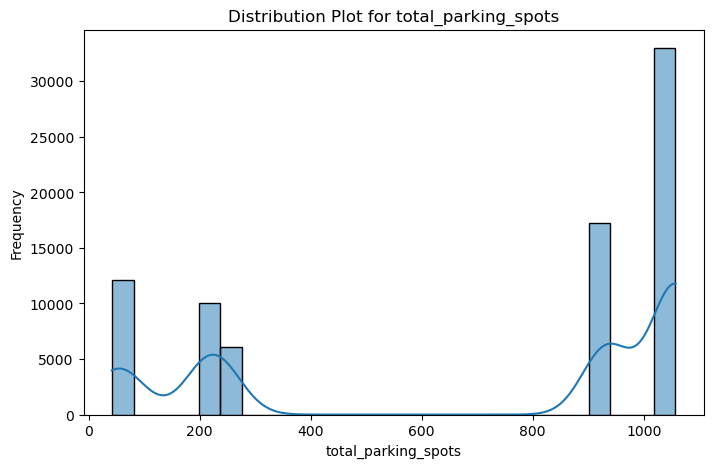

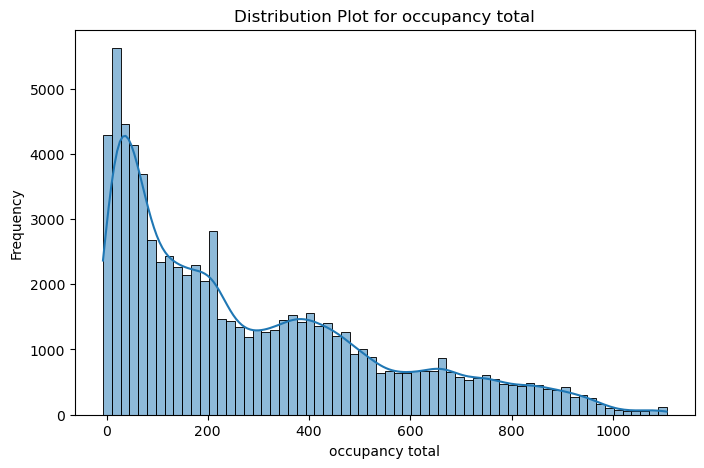

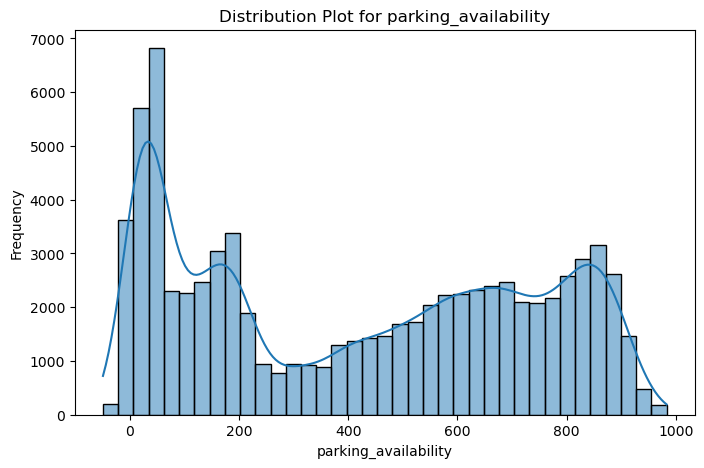

In [34]:
#A function to create plots

def create_distribution_plots(dataframe):
    # Check if the input is a DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("Input is not a DataFrame.")

    # Loop through each column in the DataFrame
    for column in dataframe.columns:
        # Check if the column is numerical
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            # Create a distribution plot
            plt.figure(figsize=(8, 5))
            sns.histplot(dataframe[column], kde=True)
            plt.title(f'Distribution Plot for {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

create_distribution_plots(processed_df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12140\1615939080.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe[column], kde=True, palette=palette)


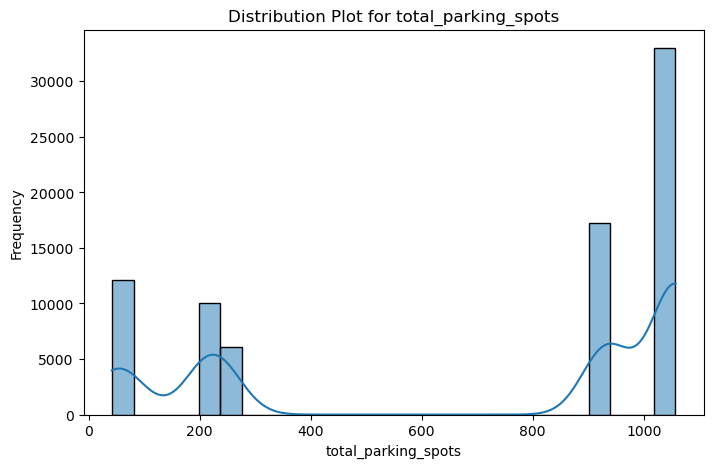

C:\Users\DELL\AppData\Local\Temp\ipykernel_12140\1615939080.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe[column], kde=True, palette=palette)


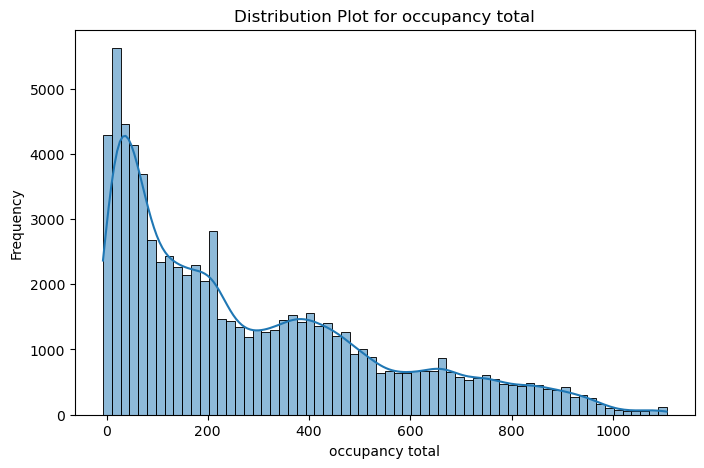

C:\Users\DELL\AppData\Local\Temp\ipykernel_12140\1615939080.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe[column], kde=True, palette=palette)


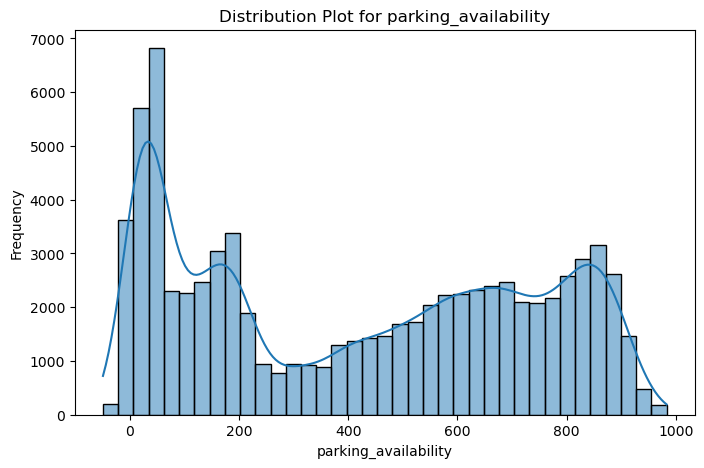

In [37]:
def create_distribution_plots(dataframe):
    """
    Function to create distribution plots for numerical columns in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): Input DataFrame.

    Returns:
    None
    """
    # Check if the input is a DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("Input is not a DataFrame.")

    # Define custom color palettes
    palette = "viridis"  # You can choose any Seaborn color palette

    # Loop through each column in the DataFrame
    for column in dataframe.columns:
        # Check if the column is numerical
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            # Create a distribution plot using seaborn
            plt.figure(figsize=(8, 5))
            sns.histplot(data=dataframe[column], kde=True, palette=palette)
            plt.title(f'Distribution Plot for {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()


create_distribution_plots(processed_df)

In [28]:
carparks_df_copy.loc[carparks_df_copy.parking_availability == 0]

,facility_name,ParkID,zone_id,total_parking_spots,occupancy total,day_of_week,date,time,parking_availability
880,Warriewood Car Park,1,1,244,244,Tuesday,2023-12-05,08:11:24,0
918,Warriewood Car Park,1,1,244,244,Tuesday,2023-12-05,08:55:38,0
962,Warriewood Car Park,1,1,244,244,Tuesday,2023-12-05,15:10:08,0
6808,Narrabeen Car Park,1,1,46,46,Monday,2023-12-04,09:02:50,0
6811,Narrabeen Car Park,1,1,46,46,Monday,2023-12-04,09:20:03,0
...,...,...,...,...,...,...,...,...,...
28217,Kiama Car Park,1,1,42,42,Sunday,2023-12-31,20:00:02,0
28219,Kiama Car Park,1,1,42,42,Sunday,2023-12-31,20:45:57,0
28221,Kiama Car Park,1,1,42,42,Sunday,2023-12-31,21:16:04,0
34284,Gosford Car Park,1,1,1057,1057,Tuesday,2023-12-05,10:03:58,0


## EXPLORATORY DATA ANALYSIS